### Create GeoJSON files to merge into tileset

Outline of Ireland and Northern Ireland and the county borders

ireland_island_osm.geojson file is first exported using Overpass Turbo and the following query:

```
[out:json][timeout:25];
(
  relation["ref"="IE0"];
  relation["boundary"="historic"]["name"="Ulster"];
);
out body;
>;
out skel qt;
```

ne_10m_admin_1_states_provinces.shp file is downloaded from Natural Earth: https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip

In [1]:
import geopandas as gpd

In [2]:
ireland = gpd.read_file("ireland_island_osm.geojson", driver="GeoJSON")
ireland

,id,@id,ISO3166-2,admin_level,boundary,name,name:en,name:ga,place,ref,source,statistical_level,type,wikidata,wikipedia,geometry
0,relation/278664,relation/278664,IE-U,5,historic,Ulster,Ulster,Cúige Uladh,region,NaN,NaN,NaN,boundary,Q93195,en:Ulster,"MULTIPOLYGON (((-8.44414 54.75763, -8.44407 54..."
1,relation/13005167,relation/13005167,NaN,NaN,statistical_region,Eire / Ireland Region,NaN,NaN,NaN,IE0,Commission Regulation (EU) 2016/2066,NUTS 1,boundary,NaN,NaN,"MULTIPOLYGON (((-7.03308 52.13219, -7.03329 52..."


<Axes: >

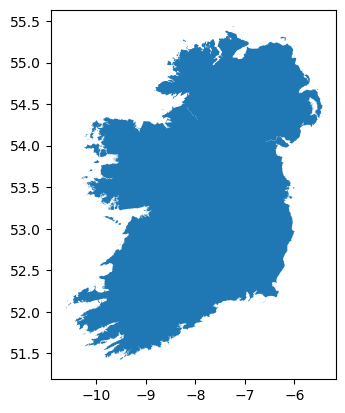

In [3]:
ireland.plot()

<Axes: >

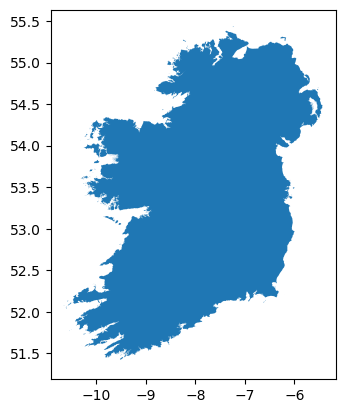

In [4]:
ireland = ireland.dissolve()
ireland.plot()

In [5]:
ireland

,geometry,id,@id,ISO3166-2,admin_level,boundary,name,name:en,name:ga,place,ref,source,statistical_level,type,wikidata,wikipedia
0,"MULTIPOLYGON (((-10.24836 51.57020, -10.24833 ...",relation/278664,relation/278664,IE-U,5,historic,Ulster,Ulster,Cúige Uladh,region,IE0,Commission Regulation (EU) 2016/2066,NUTS 1,boundary,Q93195,en:Ulster


In [6]:
ireland[['geometry', 'ref']].to_file('ireland.geojson', driver="GeoJSON")

#### County borders

<Axes: >

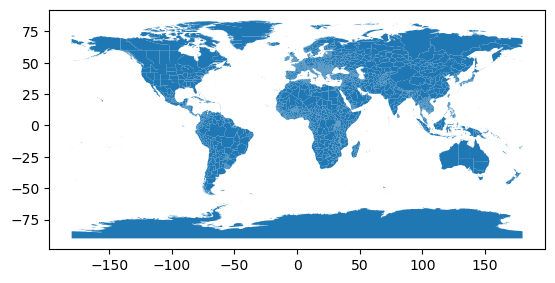

In [7]:
gdf = gpd.read_file("ne_10m_admin_1_states_provinces.shp")
gdf.plot()

<Axes: >

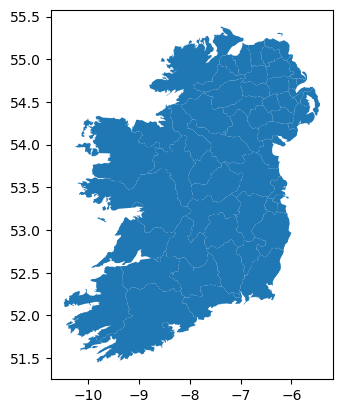

In [8]:
clipped = gpd.clip(gdf, ireland)
clipped.plot()

In [9]:
clipped.to_file("counties.geojson", driver="GeoJSON")